In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [62]:
print(df.dtypes) #Lists all the Attribute Types
print('--------------------------------')
print(df.shape) # Gives the shape of the dataframe (# of rows, # of columns)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
--------------------------------
(1599, 12)


# Data Exploration using Statistical Descriptions

### Central Tendency Measures
###### Finding the mean, median, mode and midrange. We also would like to have an idea of the dispersion of the data, how the data is spread, by finding the range, quartiles and IQR.

In [63]:
def describe_new(df): #function that adds range, midrange, and IQR to the .describe() table
    df1 = df.describe() #stores  the original .describe() into df1
    df1.loc["range"] = df1.loc['max'] - df1.loc['min'] #creates another row for the ranges
    df1.loc["Midrange"] = (df1.loc['max'] - df1.loc['min']) / 2 #Creates another row for the midrange
    df1.loc["IQR"] = df1.loc['75%'] - df1.loc['25%'] #Creates another row for Interquantile Range
    return df1

describe_new(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000
range,11.300000,1.460000,1.000000,14.600000,0.599000,71.000000,283.000000,0.013620,1.270000,1.670000,6.500000,5.000000
Midrange,5.650000,0.730000,0.500000,7.300000,0.299500,35.500000,141.500000,0.006810,0.635000,0.835000,3.250000,2.500000


In [64]:
df.mode()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.6,0.0,2.0,0.08,6.0,28.0,0.9972,3.3,0.6,9.5,5


### Skewness
###### Measures the deviation of the given distribution of a random variable from a symmetric distribution. 

In [65]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

### Class Imbalance
###### How balanced the class values are. So when we have a class imbalance, the machine learning classifier tends to be more biased towards the majority class, causing bad classification of the minority class.

In [66]:
class_count = df.groupby('quality').size()
class_count

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

In [67]:
print('3: ', class_count[3]/df['quality'].size)
print('4: ', class_count[4]/df['quality'].size)
print('5: ', class_count[5]/df['quality'].size)
print('6: ', class_count[6]/df['quality'].size)
print('7: ', class_count[7]/df['quality'].size)
print('8: ', class_count[8]/df['quality'].size)

3:  0.006253908692933083
4:  0.03314571607254534
5:  0.425891181988743
6:  0.3989993746091307
7:  0.12445278298936835
8:  0.01125703564727955


### Correlation
###### How one or more attributes are related to each other.

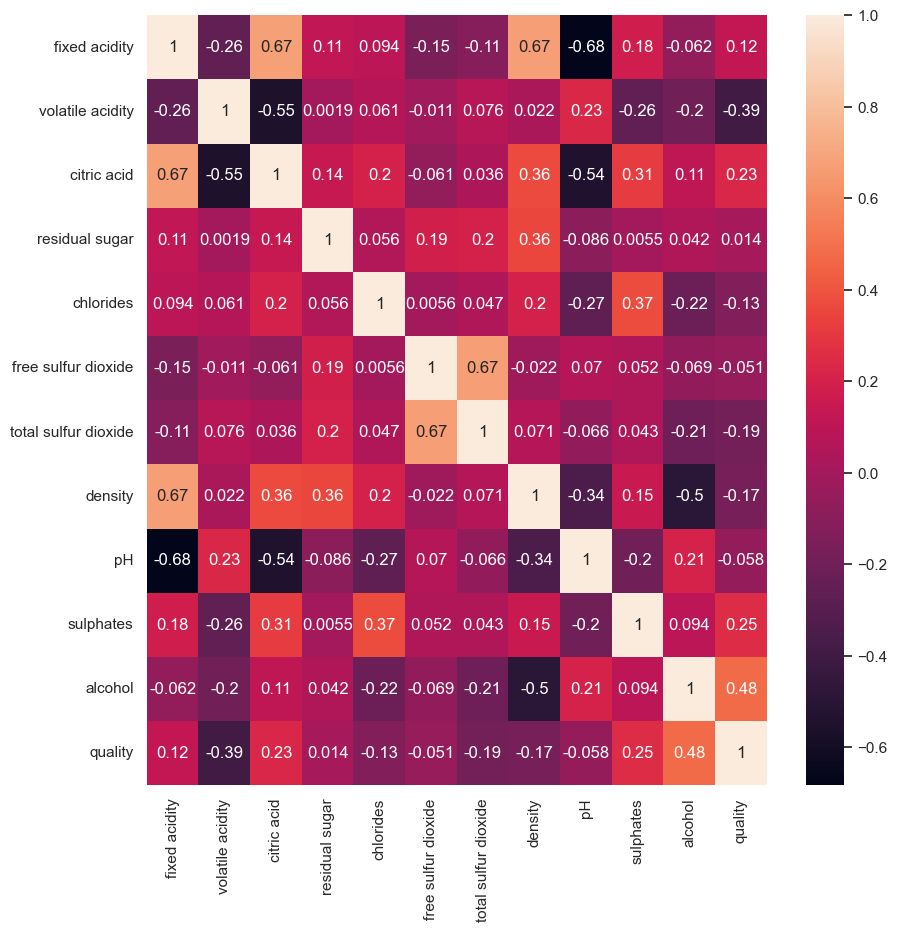

In [68]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
sns.set(rc = {'figure.figsize':(10, 10)})

# Data Visualization

<Axes: >

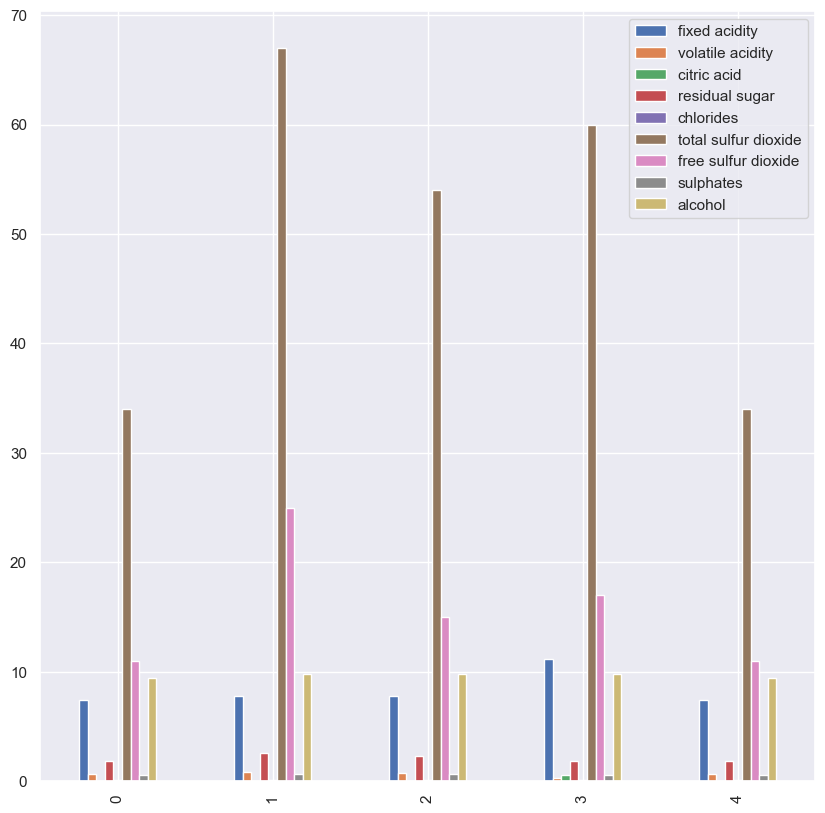

In [69]:
df1 = df[:5]
df1.plot(df.index.name, ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'free sulfur dioxide', 'sulphates', 'alcohol'], kind = 'bar')

<Axes: >

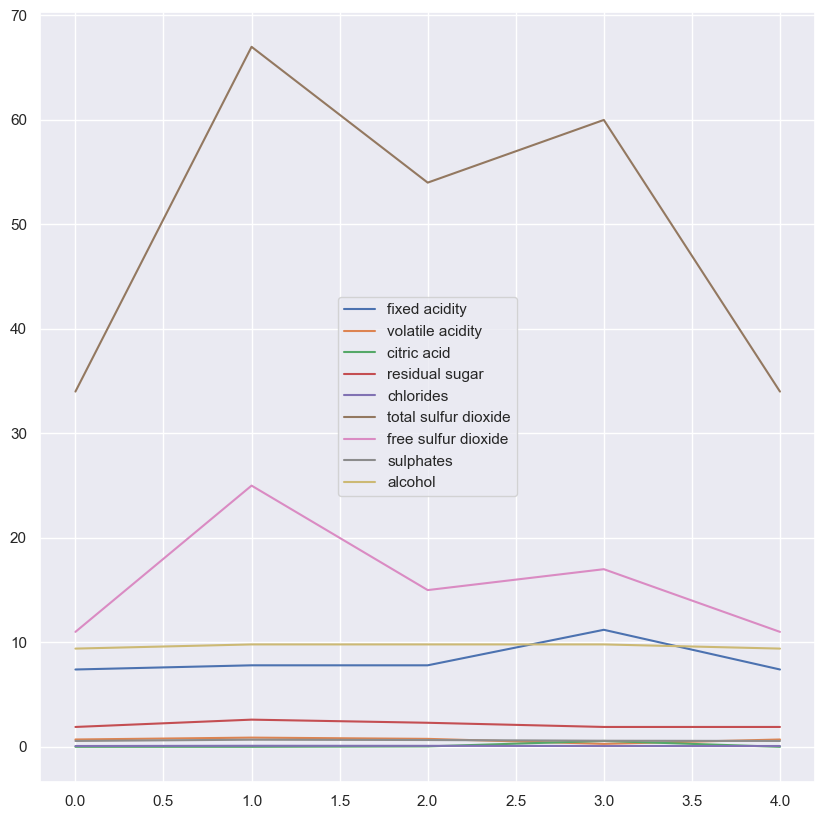

In [70]:
df1 = df[:5]
df1.plot(df.index.name, ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'free sulfur dioxide', 'sulphates', 'alcohol'], kind = 'line')

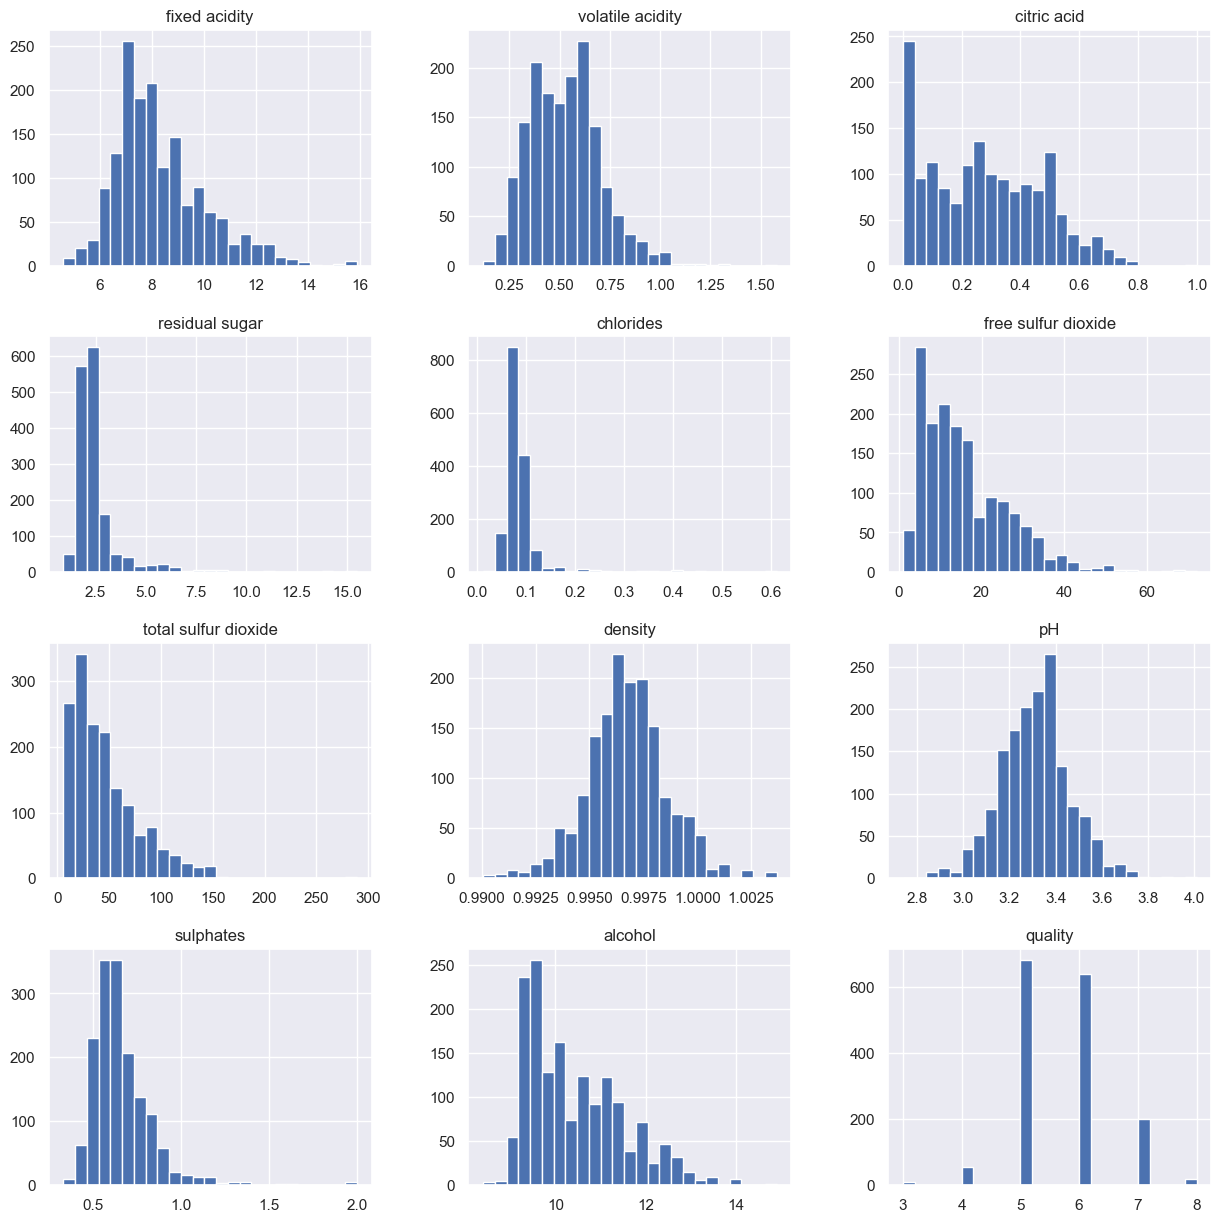

In [71]:
df.hist(bins=25, figsize=(15,15))
plt.show()

([<matplotlib.patches.Wedge at 0x12859c350>,
 [Text(1.0587273918848725, 0.29849004953709274, 'fixed acidity'),
  Text(0.9278473801341391, 0.5908462060284507, 'volatile acidity'),
  Text(0.9119370812656847, 0.6151184924976847, 'citric acid'),
  Text(0.8510065463356763, 0.6969848334747498, 'residual sugar'),
  Text(0.7874214148271893, 0.7680934288688763, 'chlorides'),
  Text(0.2940198622076684, 1.0599775094913022, 'free sulfur dioxide'),
  Text(-1.0740074568389886, -0.2377140775264448, 'total sulfur dioxide'),
  Text(0.23446074352117152, -1.0747223640305898, 'density'),
  Text(0.3844979125829414, -1.0306121264662866, 'pH'),
  Text(0.5159307284491557, -0.9715016641477892, 'sulphates'),
  Text(0.8294524304520783, -0.7225016717054297, 'alcohol'),
  Text(1.0809945392054128, -0.20359471065839987, 'quality')])

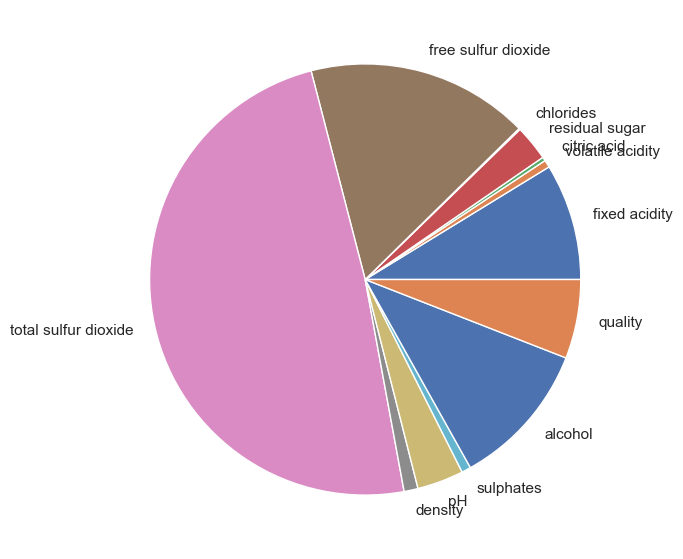

In [72]:
fig = plt.figure(figsize =(10, 7))

label = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality' ]
#Create the pie chart
plt.pie(df.mean(), labels = label)

<Axes: ylabel='Density'>

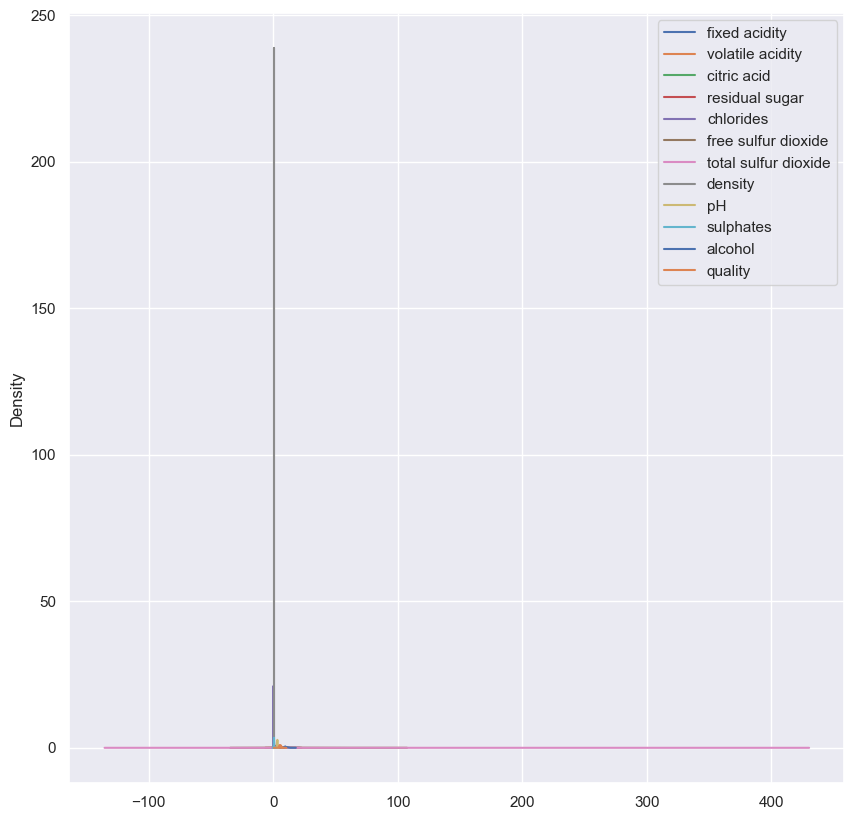

In [73]:

#density graph
df.plot(df.index.name, ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'], kind = 'density')

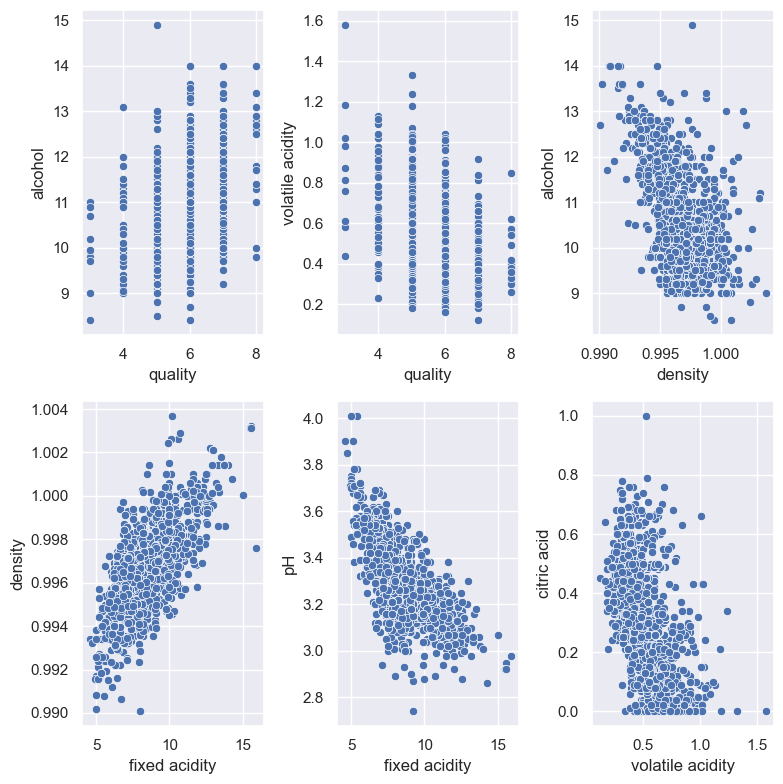

In [74]:
fig, axes = plt.subplots(2, 3, figsize=(8, 8))#Creates six separate boxplots, 
                                             #figsize enlarges the plots so that it is more visble

sns.scatterplot(df, x = 'quality', y = 'alcohol', ax = axes[0,0])
sns.scatterplot(df, x = 'quality', y = 'volatile acidity', ax = axes[0,1])
sns.scatterplot(df, x = 'density', y = 'alcohol', ax = axes[0,2])
sns.scatterplot(df, x = 'fixed acidity', y = 'density', ax = axes[1,0])
sns.scatterplot(df, x = "fixed acidity", y = 'pH', ax = axes[1,1])
sns.scatterplot(df, x = "volatile acidity", y = 'citric acid', ax = axes[1,2])

fig.tight_layout() #Separates the subplots so that they're not cramped together

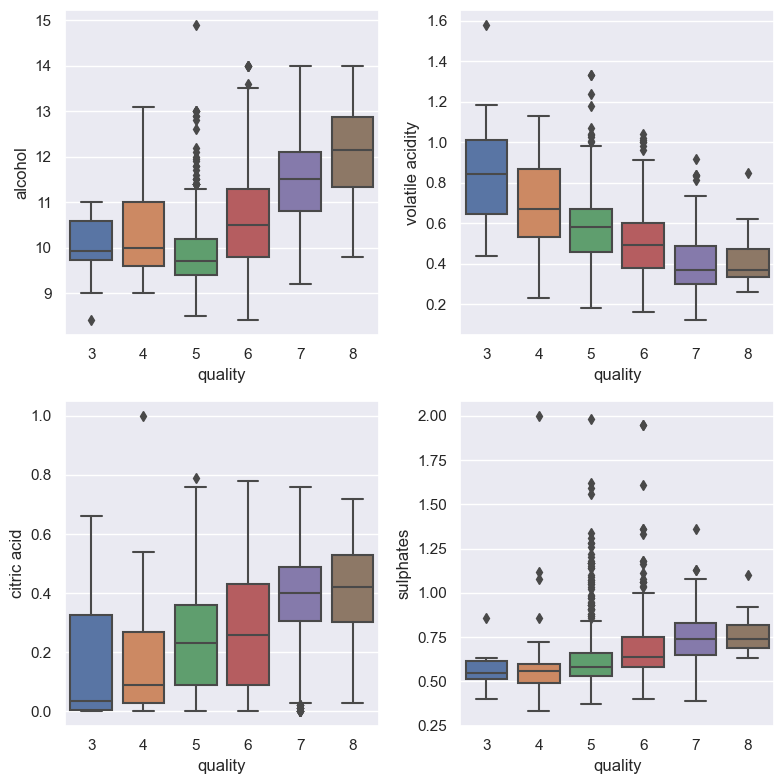

In [75]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

sns.boxplot(data = df, x = "quality", y = "alcohol", ax = axes[0,0])
sns.boxplot(data = df, x = "quality", y = "volatile acidity", ax = axes[0,1])
sns.boxplot(data = df, x = "quality", y = "citric acid", ax = axes[1,0])
sns.boxplot(data = df, x = "quality", y = "sulphates", ax = axes[1,1])

fig.tight_layout() #Separates the subplots so that they're not cramped together

<Axes: xlabel='quality', ylabel='alcohol'>

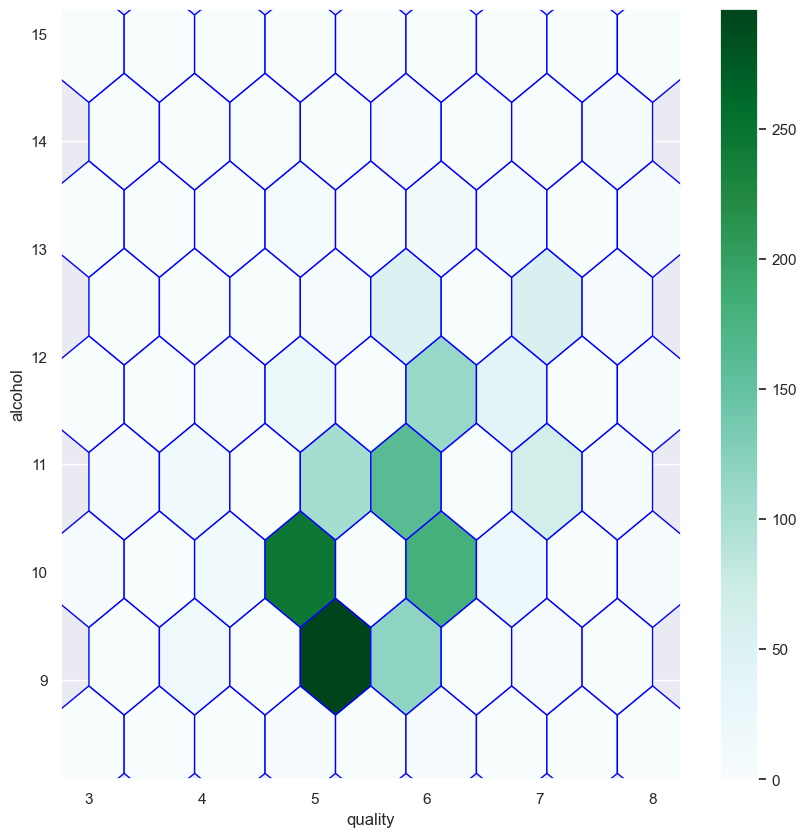

In [76]:
df.plot(x = 'quality', y = 'alcohol', kind = 'hexbin', color = 'blue', gridsize = 8)

<Axes: xlabel='quality', ylabel='volatile acidity'>

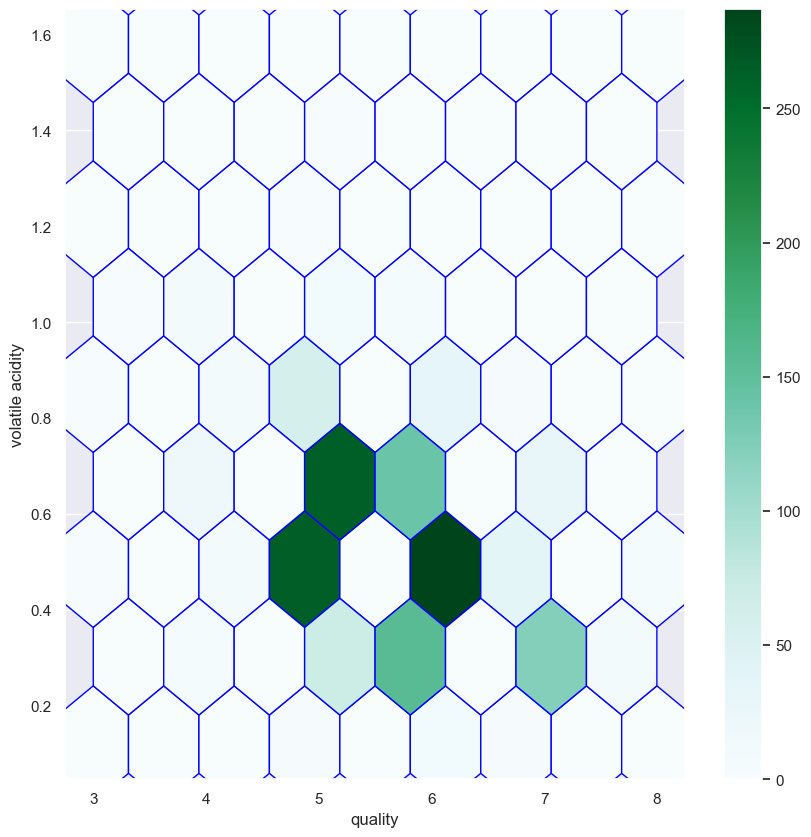

In [77]:
df.plot(x='quality',y='volatile acidity', kind='hexbin',color='blue', gridsize = 8)

<Axes: xlabel='density', ylabel='alcohol'>

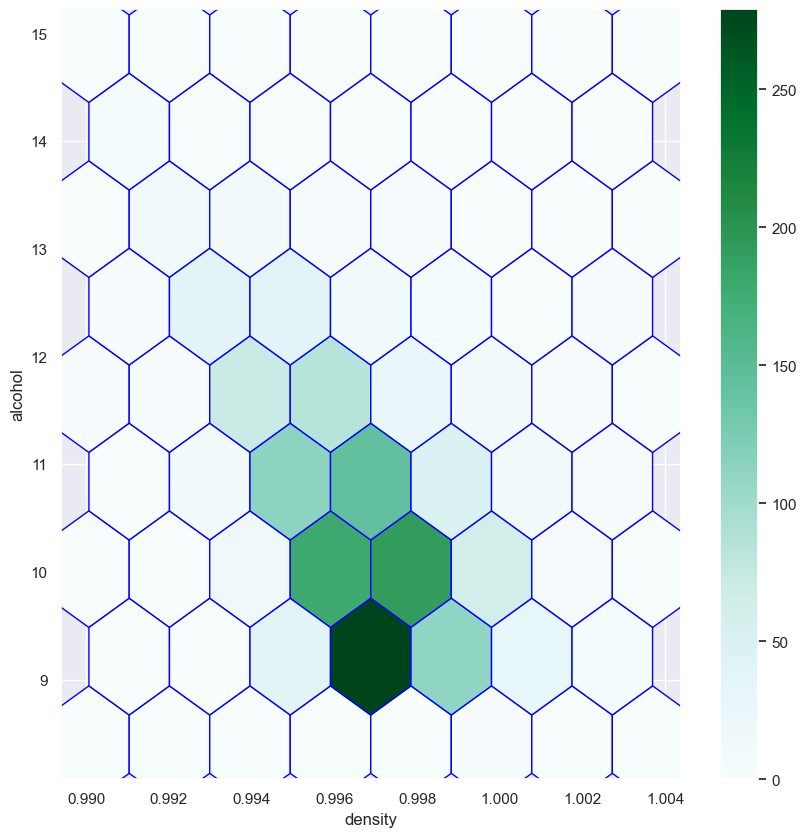

In [78]:
df.plot(x='density',y='alcohol', kind='hexbin',color='blue', gridsize = 7)

<Axes: xlabel='fixed acidity', ylabel='density'>

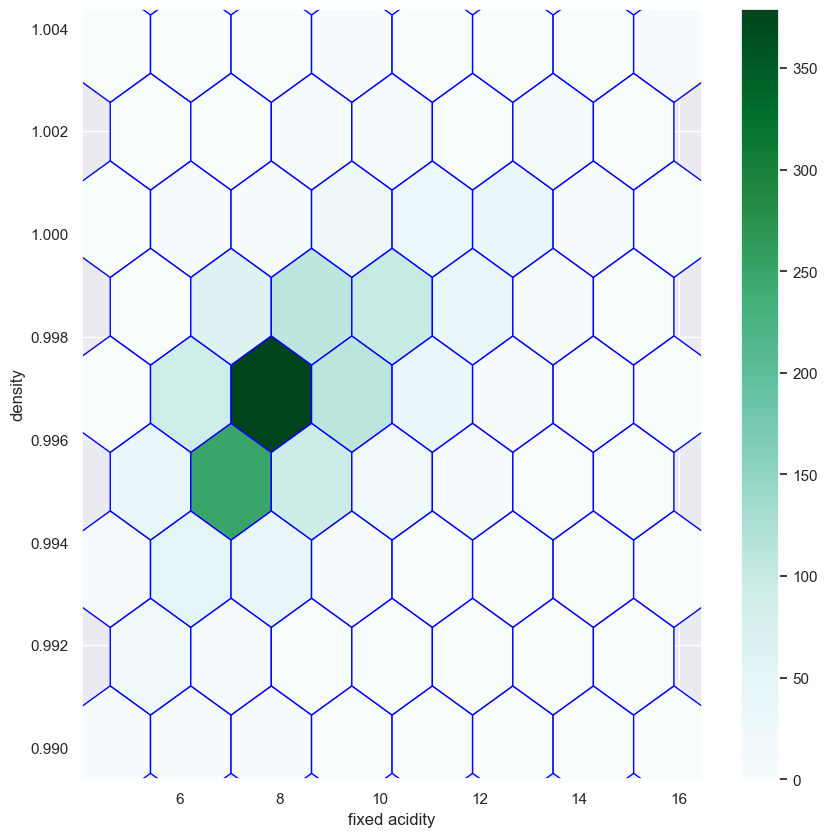

In [79]:
df.plot(x='fixed acidity',y='density', kind='hexbin',color='blue', gridsize = 7)

# Data Preprocessing

In [80]:
#Checking for any Missing, Null, or NA values 
print(df.isnull().sum())
print('\n', df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Fixing Class Imbalance
There are a lot more tuples where the quality is of 5 or 6, therefore it will cause a bias towards those values during modeling. To solve that we will add more data with qualities of 3, 4, 7 and 8 through the use of <b>bootstrapping,<b>

In [81]:
df1 = df.copy()
df1 = df1[df1['quality'] != 5]
df1 = df1[df1['quality'] != 6]

In [82]:
def bootstrapping(df, x):
    # Number of bootstrapped datasets to create
    num_bootstraps = x

    # Initialize an empty list to store bootstrapped datasets
    bootstrapped_datasets = []

    # Randomly sample rows with replacement to create a bootstrapped dataset
    for x in range(num_bootstraps):
        bootstrapped_sample = df1.sample(n = len(df1), replace=True)
    
        # Append the bootstrapped dataset to the list
        bootstrapped_datasets.append(bootstrapped_sample)

    #Save the bootstrapped datasets to separate CSV files
    for i, bootstrapped_data in enumerate(bootstrapped_datasets):
        dfs = bootstrapped_datasets
    
    return dfs

In [83]:
dfs = bootstrapping(df1, 3)
dfs = pd.concat(dfs)

In [84]:
df1 = df1[df1['quality'] != 7]

dfs2 = bootstrapping(df1, 10)
dfs2 = pd.concat(dfs2)

In [85]:
df1 = df1[df1['quality'] != 4]

dfs3 = bootstrapping(df1, 20)
dfs3 = pd.concat(dfs3)

In [86]:
DF = [df,dfs,dfs2,dfs3]
df = pd.concat(DF)

In [87]:
class_count = df.groupby('quality').size()
class_count

quality
3    336
4    736
5    681
6    638
7    801
8    617
dtype: int64

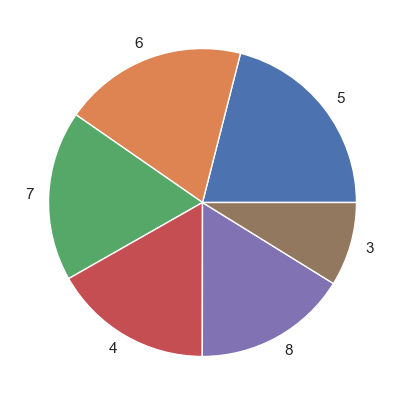

In [88]:
classes = df['quality'].unique()

# Count the number of instances in each class
counts = df['quality'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=classes)
plt.show()

###### Checking for Outliars using Boxplots

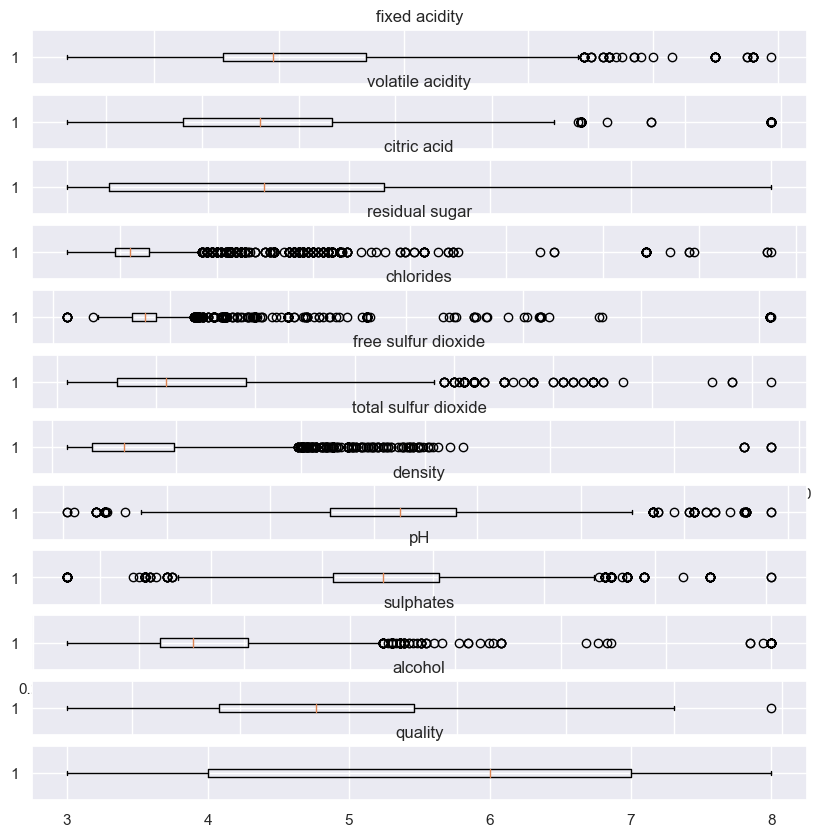

In [89]:
#Using boxplots to check for outliars
fig, axes = plt.subplots(nrows=df.shape[1], ncols=1, figsize=(10, 10))

# Loop over the features
for i, feature in enumerate(df.columns):

    # Create a boxplot
    ax = axes[i]
    ax.boxplot(df[feature], vert = False)
    ax.set_title(feature)

# Show the figure
plt.show()

In [90]:
#Function to replace outliers with the median value
def replace_outliers_with_median(df, threshold = 1):
    
    # Iterate over each column in the DataFrame
    for column in df.columns[:-1]:
        # Calculate the median and interquartile range (IQR) for the current column
        median = df[column].median()
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1

        # Define the lower and upper bounds for outliers
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        # Replace outliers with the median for the current column
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])

    return df

df = replace_outliers_with_median(df)

###### Boxplots after Outlier Cleaning

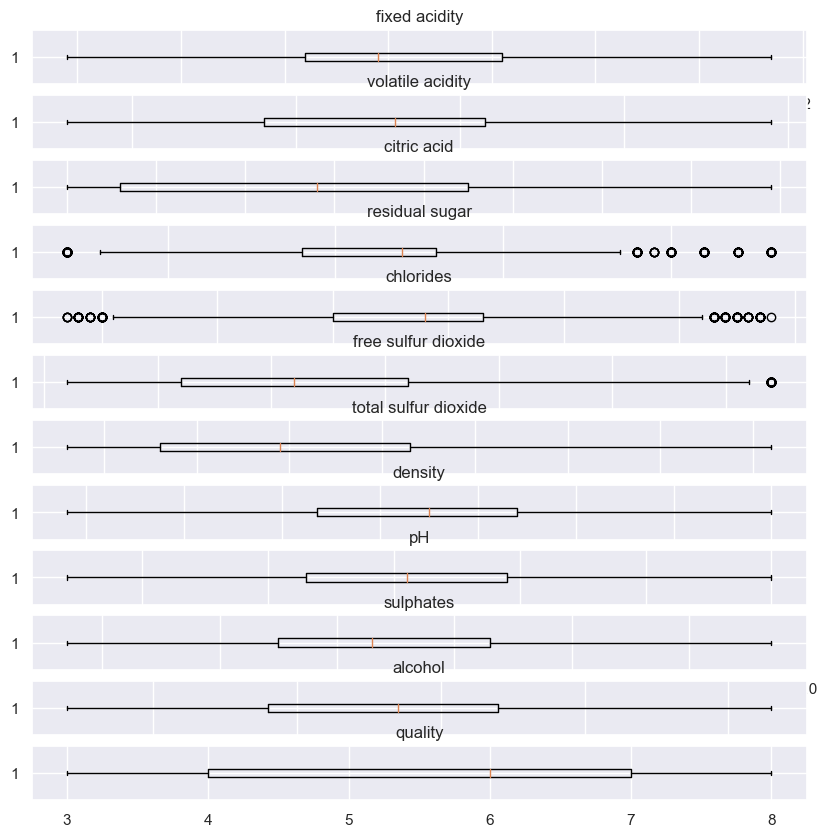

In [91]:
#Using boxplots to check for outliars
fig, axes = plt.subplots(nrows=df.shape[1], ncols=1, figsize=(10, 10))

# Loop over the features
for i, feature in enumerate(df.columns):

    # Create a boxplot
    ax = axes[i]
    ax.boxplot(df[feature], vert = False)
    ax.set_title(feature)

# Show the figure
plt.show()

### Feature Selection

In [92]:
X = df.drop('quality', axis = 1)
Y = df['quality']

In [93]:
#Using random forest to find feature importance
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

#Trains the model
clf.fit(X, Y)

#Calculates the feature importance
importances = clf.feature_importances_

#Prints the feature importance
print(importances)
names = X.keys()

[0.08332321 0.10823515 0.08889354 0.06255159 0.08039107 0.06419723
 0.08813565 0.08276275 0.0779979  0.13670301 0.1268089 ]


In [94]:
#Sorting Features and Feature names
indices = np.argsort(importances)[::-1]
sorted_feature_names = [names[i] for i in indices]
sorted_importances = importances[indices]

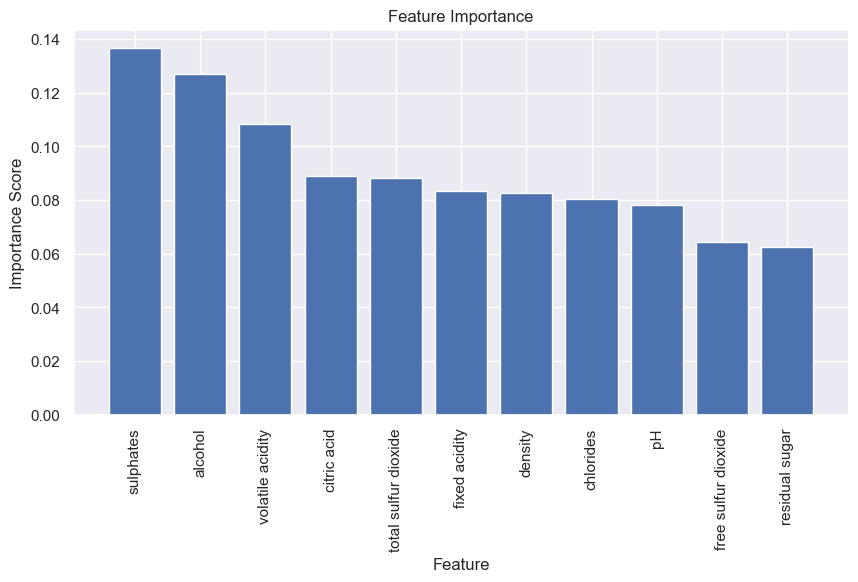

In [95]:
#Plotting Feature Importance in a barchart
plt.figure(figsize=(10, 5))

plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation='vertical')
plt.show()

In [96]:
#Dropping the least important Features
df = df.drop(columns = ['residual sugar'])
df = df.drop(columns = ['free sulfur dioxide'])
df = df.drop(columns = ['pH'])

In [97]:
df

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
828,7.8,0.570,0.09,0.065,45.0,0.99417,0.74,12.7,8
1478,7.1,0.875,0.05,0.082,14.0,0.99808,0.52,10.2,3
278,10.3,0.320,0.45,0.073,13.0,0.99760,0.82,12.6,8
495,10.7,0.350,0.53,0.070,16.0,0.99720,0.65,11.0,8


### Decision Tree Modeling

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

In [54]:
#Decision Tree Model
#Test Entropy and Gini Calculations
#Applying GridSearch to check which metrics work best

parameters = {
              'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

#Decision Tree
model = DecisionTreeClassifier()
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridDecisionTree.fit(X_train, y_train)

print('Min Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Min Split:  3
Max Nvl:  10
Algorithm:  entropy
Score:  0.80538898154972


In [56]:
#Running Decision Tree
tree_clf = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 3, max_depth = 10)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3)

In [57]:
y_pred = tree_clf.predict(X_test)

In [58]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           3       0.93      1.00      0.96        54
           4       0.89      1.00      0.94       161
           5       0.72      0.62      0.66       136
           6       0.62      0.49      0.55       129
           7       0.86      0.94      0.90       176
           8       0.94      1.00      0.97       106

    accuracy                           0.83       762
   macro avg       0.83      0.84      0.83       762
weighted avg       0.82      0.83      0.82       762

